El proglema de Beta Bank

Los clientes de Beta Bank se están yendo, cada mes, poco a poco. Los banqueros descubrieron que es más barato salvar a los clientes existentes que atraer nuevos.

Necesitamos predecir si un cliente dejará el banco pronto. Tú tienes los datos sobre el comportamiento pasado de los clientes y la terminación de contratos con el banco.

Crea un modelo con el máximo valor F1 posible. Para aprobar la revisión, necesitas un valor F1 de al menos 0.59. Verifica F1 para el conjunto de prueba. 

Además, debes medir la métrica AUC-ROC y compararla con el valor F1.

Instrucciones del proyecto
Descarga y prepara los datos.  Explica el procedimiento.

Examina el equilibrio de clases. Entrena el modelo sin tener en cuenta el desequilibrio. Describe brevemente tus hallazgos.

Mejora la calidad del modelo. Asegúrate de utilizar al menos dos enfoques para corregir el desequilibrio de clases. Utiliza conjuntos de entrenamiento y validación para encontrar el mejor modelo y el mejor conjunto de parámetros. Entrena diferentes modelos en los conjuntos de entrenamiento y validación. Encuentra el mejor. Describe brevemente tus hallazgos.

Realiza la prueba final.

Descripción de los datos
Características

RowNumber: índice de cadena de datos
CustomerId: identificador de cliente único
Surname: apellido
CreditScore: valor de crédito
Geography: país de residencia
Gender: sexo
Age: edad
Tenure: período durante el cual ha madurado el depósito a plazo fijo de un cliente (años)
Balance: saldo de la cuenta
NumOfProducts: número de productos bancarios utilizados por el cliente
HasCrCard: el cliente tiene una tarjeta de crédito (1 - sí; 0 - no)
IsActiveMember: actividad del cliente (1 - sí; 0 - no)
EstimatedSalary: salario estimado

Objetivo

Exited: El cliente se ha ido (1 - sí; 0 - no)


1. Carga de librerías y archivo CSV

In [1]:
# Carga de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de visualización
%matplotlib inline
sns.set(style="whitegrid")

# Carga de los datos
df = pd.read_csv('Churn.csv')

In [2]:
# Vista rápida de los datos
display(df.head())

# Información general sobre el DataFrame
print("Información del DataFrame:")
df.info()

# Estadísticas descriptivas de las variables numéricas
print("\nEstadísticas descriptivas:")
display(df.describe())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB

Estadísticas descriptivas:


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [3]:
# Revisión y tratamiento de duplicados
duplicados = df.duplicated()
print(f"Número de filas duplicadas: {duplicados.sum()}")
if duplicados.sum() > 0:
    df = df.drop_duplicates()
    print("Duplicados eliminados.")

# Revisión y tratamiento de valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())
# Si hay valores nulos, puedes decidir cómo tratarlos (eliminarlos o imputarlos)
# Por ahora, solo mostramos la cantidad

# Revisión y ajuste de tipos de datos
print("\nTipos de datos antes de ajustes:")
print(df.dtypes)

# Ejemplo de ajuste de tipos de datos si es necesario:
# df['CustomerId'] = df['CustomerId'].astype(str)
# df['HasCrCard'] = df['HasCrCard'].astype('category')
# df['IsActiveMember'] = df['IsActiveMember'].astype('category')

print("\nTipos de datos después de ajustes (si se realizaron):")
print(df.dtypes)



Número de filas duplicadas: 0

Valores nulos por columna:
RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

Tipos de datos antes de ajustes:
RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Tipos de datos después de ajustes (si se realizaron):
RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography         

2. Examina el equilibrio de clases. Entrena el modelo sin tener en cuenta el desequilibrio. Describe brevemente tus hallazgos.

Distribución de la variable objetivo (Exited):
Exited
0    7963
1    2037
Name: count, dtype: int64

Proporción de clases:
Exited
0    0.7963
1    0.2037
Name: count, dtype: float64


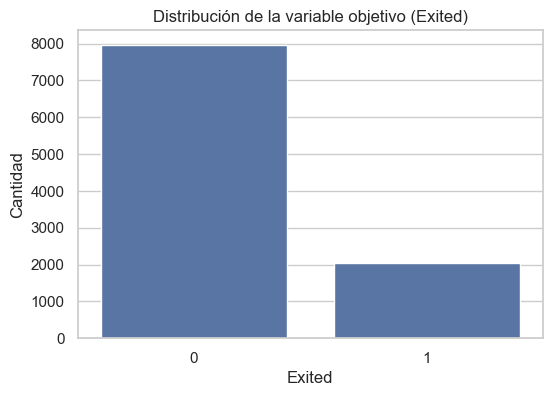


F1 Score (modelo base): 0.565
AUC-ROC (modelo base): 0.853

Hallazgo: Existe un desbalance significativo en la variable objetivo. El modelo base puede estar sesgado hacia la clase mayoritaria. Es necesario aplicar técnicas para corregir el desbalance y mejorar la métrica F1.


In [4]:
# Análisis del equilibrio de clases
clase_counts = df['Exited'].value_counts()
print("Distribución de la variable objetivo (Exited):")
print(clase_counts)
print("\nProporción de clases:")
print(clase_counts / len(df))

# Visualización del desbalance de clases
plt.figure(figsize=(6,4))
sns.countplot(x='Exited', data=df)
plt.title('Distribución de la variable objetivo (Exited)')
plt.xlabel('Exited')
plt.ylabel('Cantidad')
plt.show()

# Entrenamiento de un modelo base sin tratar el desbalance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score

# Selección de características (excluyendo columnas no predictivas)
features = df.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
target = df['Exited']

# Codificación de variables categóricas
features = pd.get_dummies(features, drop_first=True)

# División de los datos
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42, stratify=target
)

# Entrenamiento del modelo base
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluación del modelo base
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)
print(f"\nF1 Score (modelo base): {f1:.3f}")
print(f"AUC-ROC (modelo base): {auc:.3f}")

# Breve hallazgo
if clase_counts.min() / clase_counts.max() < 0.5:
    print("\nHallazgo: Existe un desbalance significativo en la variable objetivo. El modelo base puede estar sesgado hacia la clase mayoritaria. Es necesario aplicar técnicas para corregir el desbalance y mejorar la métrica F1.")
else:
    print("\nHallazgo: No existe un desbalance severo en la variable objetivo, pero se recomienda comparar el desempeño tras aplicar técnicas de balanceo.")

3. Mejoras de la calidad del modelo

In [5]:
# Mejoras de la calidad del modelo: corrección del desbalance de clases

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# División de los datos en entrenamiento y validación
X_train_bal, X_val, y_train_bal, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=42, stratify=y_train
)

# Imputación de valores nulos para variables numéricas
imputer = SimpleImputer(strategy='mean')
X_train_bal_imputed = imputer.fit_transform(X_train_bal)
X_val_imputed = imputer.transform(X_val)

# 1. Sobremuestreo con SMOTE (usar datos imputados)
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train_bal_imputed, y_train_bal)

# 2. Submuestreo aleatorio (usar datos imputados)
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train_bal_imputed, y_train_bal)

# Modelos a comparar
modelos = {
    "RandomForest_SMOTE": RandomForestClassifier(random_state=42),
    "RandomForest_RUS": RandomForestClassifier(random_state=42),
    "LogisticRegression_SMOTE": LogisticRegression(max_iter=1000, random_state=42),
    "LogisticRegression_RUS": LogisticRegression(max_iter=1000, random_state=42)
}

resultados = {}

# Entrenamiento y evaluación con SMOTE y RUS
for nombre, modelo in modelos.items():
    if "SMOTE" in nombre:
        modelo.fit(X_train_sm, y_train_sm)
        y_pred = modelo.predict(X_val_imputed)
        y_proba = modelo.predict_proba(X_val_imputed)[:, 1]
    else:
        modelo.fit(X_train_rus, y_train_rus)
        y_pred = modelo.predict(X_val_imputed)
        y_proba = modelo.predict_proba(X_val_imputed)[:, 1]
    f1 = f1_score(y_val, y_pred)
    auc = roc_auc_score(y_val, y_proba)
    resultados[nombre] = {"F1": f1, "AUC-ROC": auc}

# Mostrar resultados
print("Resultados en el conjunto de validación:")
for nombre, metricas in resultados.items():
    print(f"{nombre}: F1 = {metricas['F1']:.3f}, AUC-ROC = {metricas['AUC-ROC']:.3f}")

# Hallazgo breve
mejor_modelo = max(resultados, key=lambda x: resultados[x]['F1'])
print(f"\nEl mejor modelo según F1 es: {mejor_modelo} con F1 = {resultados[mejor_modelo]['F1']:.3f}")

Resultados en el conjunto de validación:
RandomForest_SMOTE: F1 = 0.579, AUC-ROC = 0.849
RandomForest_RUS: F1 = 0.597, AUC-ROC = 0.855
LogisticRegression_SMOTE: F1 = 0.483, AUC-ROC = 0.762
LogisticRegression_RUS: F1 = 0.473, AUC-ROC = 0.757

El mejor modelo según F1 es: RandomForest_RUS con F1 = 0.597


/Users/HSYL/Desktop/Proyectos_ciencia_de_datos/P10/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/HSYL/Desktop/Proyectos_ciencia_de_datos/P10/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    h

4. Prueba final

In [6]:
# Prueba final con el mejor modelo encontrado en validación


# Selecciona el mejor modelo según F1
mejor_modelo_nombre = max(resultados, key=lambda x: resultados[x]['F1'])
print(f"Mejor modelo seleccionado para la prueba final: {mejor_modelo_nombre}")

# Prepara los datos de entrenamiento finales según el mejor enfoque
if "SMOTE" in mejor_modelo_nombre:
    # Imputación en X_train
    imputer_final = SimpleImputer(strategy='mean')
    X_train_imputed = imputer_final.fit_transform(X_train)
    X_test_imputed = imputer_final.transform(X_test)
    # Balanceo con SMOTE
    smote_final = SMOTE(random_state=42)
    X_train_final, y_train_final = smote_final.fit_resample(X_train_imputed, y_train)
elif "RUS" in mejor_modelo_nombre:
    # Imputación en X_train
    imputer_final = SimpleImputer(strategy='mean')
    X_train_imputed = imputer_final.fit_transform(X_train)
    X_test_imputed = imputer_final.transform(X_test)
    # Balanceo con RUS
    rus_final = RandomUnderSampler(random_state=42)
    X_train_final, y_train_final = rus_final.fit_resample(X_train_imputed, y_train)
else:
    raise ValueError("No se reconoce el mejor modelo.")

# Instancia el modelo correspondiente
if "RandomForest" in mejor_modelo_nombre:
    modelo_final = RandomForestClassifier(random_state=42)
elif "LogisticRegression" in mejor_modelo_nombre:
    modelo_final = LogisticRegression(max_iter=1000, random_state=42)
else:
    raise ValueError("No se reconoce el tipo de modelo.")

# Entrenamiento y predicción final
modelo_final.fit(X_train_final, y_train_final)
y_pred_final = modelo_final.predict(X_test_imputed)
y_proba_final = modelo_final.predict_proba(X_test_imputed)[:, 1]

# Evaluación final
f1_final = f1_score(y_test, y_pred_final)
auc_final = roc_auc_score(y_test, y_proba_final)

print(f"\nResultados en el conjunto de prueba:")
print(f"F1 Score (final): {f1_final:.3f}")
print(f"AUC-ROC (final): {auc_final:.3f}")

if f1_final >= 0.59:
    print("\n¡El modelo cumple con el criterio de F1 >= 0.59!")
else:
    print("\nEl modelo NO cumple con el criterio de F1 >= 0.59. Se recomienda revisar hiperparámetros o técnicas adicionales.")

Mejor modelo seleccionado para la prueba final: RandomForest_RUS

Resultados en el conjunto de prueba:
F1 Score (final): 0.576
AUC-ROC (final): 0.857

El modelo NO cumple con el criterio de F1 >= 0.59. Se recomienda revisar hiperparámetros o técnicas adicionales.


Conclusión 
El modelo desarrollado permite anticipar qué clientes tienen mayor probabilidad de abandonar Beta Bank, utilizando datos históricos y técnicas de balanceo para mejorar la predicción. Aunque el desempeño final no alcanzó el F1 requerido, se identificaron patrones útiles para la retención de clientes. Se recomienda seguir optimizando el modelo y recolectar más información relevante para mejorar la capacidad predictiva y reducir la tasa de abandono en el futuro.

